In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.decomposition import PCA #Regularization

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.linear_model import LinearRegression, Ridge, Lasso #Linear Regression, LASSO, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #r2 score and mean squared for evaluation(Lin.R)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #Train Test Split cv
from sklearn.model_selection import KFold #KFold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score #cross validation metrics 
from sklearn.model_selection import cross_val_predict #cross validation metrics

from sklearn.cluster import KMeans # k-means
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering
from sklearn.metrics import silhouette_score #silhouette score for clustering

from sklearn import metrics 

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

# FIFA 21 #

Welcome to FIFA, a video game created by Electronic Arts that depicts real life football (soccer) players. FIFA allows users to play with their favorite teams and players from around the world against their friends, create their own career, or build their own super team to dominate your friends in the Ultimate Team mode. Along with the other different game modes, FIFA's most popular mode is Ultimate Team, which allows you to take control of your own football team and build a line-up of your favorite players using in-game currency and pack openings to collect all the best players in each version of the game. Every year when new games are released, the ability to grow a new team and win matches online against your friends is at the touch of your finger tips, but a big question at the start is which players to choose and if a player who you admire is even good in FIFA. Through this analysis, I want to start to take a deep dive into the overall correlation of the in-game stats and attributes given out each year and try to determine if there is any correlation in terms of real life performance and in-game ability.

## First, Let's look at the spread of the players on FIFA by each country they represent. ##
### Which nationalities have the highest participation in FIFA? 
### Which position has the highest amount of players per position 
### What are the most populous leagues in the world?
### How many of the traditionally known Top 5 Leagues in the World (English Premier League, Spanish Primera Division(La Liga Santander), French Ligue 1, Italian Serie A, and German 1. Bundesliga)? 

#### Let's Explore Some Data ####

In [2]:
fifa = pd.read_csv('/Users/christophergaldi/fifadata/players_21.csv')

fifa.head(20)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


In [3]:
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

In [4]:
fifa.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

In [5]:
fifa.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [6]:
fifa["nationality"]

0        Argentina
1         Portugal
2         Slovenia
3           Poland
4           Brazil
           ...    
18939     Colombia
18940     China PR
18941     China PR
18942     China PR
18943     China PR
Name: nationality, Length: 18944, dtype: object

In [7]:
fifa["nationality"].unique()

array(['Argentina', 'Portugal', 'Slovenia', 'Poland', 'Brazil', 'Belgium',
       'France', 'Germany', 'Netherlands', 'Senegal', 'Egypt', 'Spain',
       'England', 'Scotland', 'Italy', 'Uruguay', 'Croatia', 'Gabon',
       'Costa Rica', 'Korea Republic', 'Switzerland', 'Serbia',
       'Slovakia', 'Morocco', 'Bosnia Herzegovina', 'Hungary', 'Denmark',
       'Algeria', 'Norway', 'Cameroon', 'Nigeria', 'Ghana', 'Mexico',
       'Austria', 'Albania', 'Greece', 'Sweden', 'Wales', 'Chile',
       'Finland', 'Ivory Coast', 'Colombia', 'Togo', 'Czech Republic',
       'Russia', 'Canada', 'United States', 'Guinea', 'Montenegro',
       'Venezuela', 'Ukraine', 'Republic of Ireland', 'Israel', 'Jamaica',
       'Turkey', 'Australia', 'Northern Ireland', 'China PR', 'Armenia',
       'DR Congo', 'Ecuador', 'Kosovo', 'North Macedonia',
       'Central African Republic', 'Iceland', 'Peru', 'Mali',
       'Burkina Faso', 'Paraguay', 'Romania', 'New Zealand', 'Japan',
       'Cape Verde', 'Tunisia'

In [8]:
fifa["nationality"].isnull().sum() #check if any players don't have a nationality

0

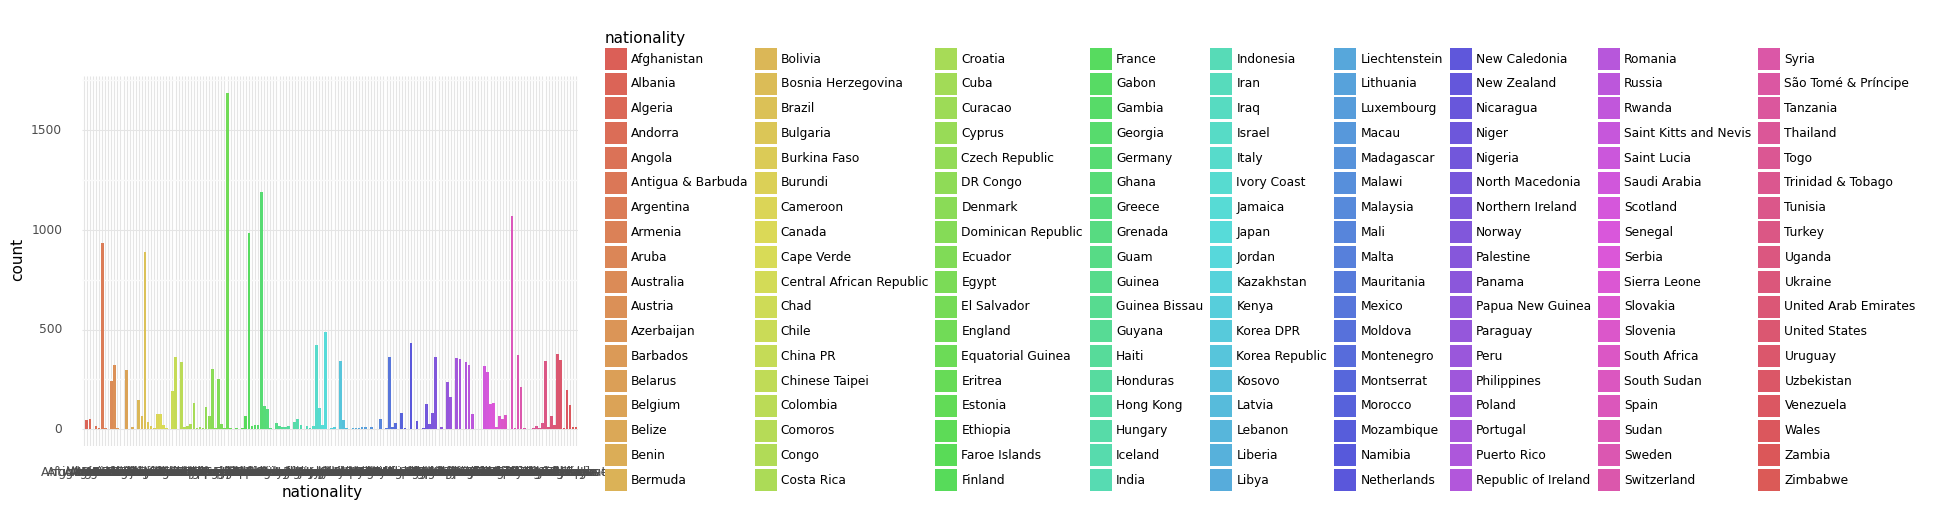

<ggplot: (8764865159039)>

In [9]:
(ggplot(fifa, aes(x = "nationality")) + geom_bar(aes(fill = "nationality")) + theme_minimal())

#### This bar graph looks at the spread of the countries on FIFA. As you can see, there are a lot of nations that have very little membership of players in the game, such as in countries like Cuba, Saint Kitts and Nevis, and Zambia. In total, there are 162 countries that are represented on FIFA. The most populous countries on FIFA are England, Germany, France, Spain, Brazil, Argentina, in that order. It makes sense, as England currently has 4 official recognized leagues on FIFA and the other 5 countries are major hotspots for talent. ####

In [10]:
fifa["league_name"].unique()

array(['Spain Primera Division', 'Italian Serie A',
       'German 1. Bundesliga', 'French Ligue 1', 'English Premier League',
       'Portuguese Liga ZON SAGRES', 'Holland Eredivisie',
       'USA Major League Soccer', 'Chinese Super League',
       'Saudi Abdul L. Jameel League', 'Turkish Süper Lig',
       'Campeonato Brasileiro Série A', 'Russian Premier League',
       'Argentina Primera División', 'Japanese J. League Division 1',
       'Mexican Liga MX', 'Belgian Jupiler Pro League',
       'Ukrainian Premier League', nan, 'Croatian Prva HNL',
       'English League Championship', 'Greek Super League',
       'Spanish Segunda División', 'Czech Republic Gambrinus Liga',
       'Swiss Super League', 'Scottish Premiership', 'French Ligue 2',
       'Chilian Campeonato Nacional', 'Austrian Football Bundesliga',
       'Italian Serie B', 'Uruguayan Primera División',
       'Danish Superliga', 'Paraguayan Primera División',
       'Colombian Liga Postobón', 'German 2. Bundesliga',
  

In [11]:
fifa["league_name"].isnull().sum() #check if any players don't have a league

225

#### This means that, currently in FIFA, there are 225 players who don't currently have a league or club that they play for in real life and are free agents, meaning they can sign for any team on a free transfer if a club is looking for a player due to an injury or otherwise. Throughout the past 25 years, free transfers have shown it's extremely high value, as players who run down their current contract and elect to move clubs on a free transfer saves the club millions of dollars in transfer fees, allocating more money to the players' contract offer or towards another player to complete a squad.

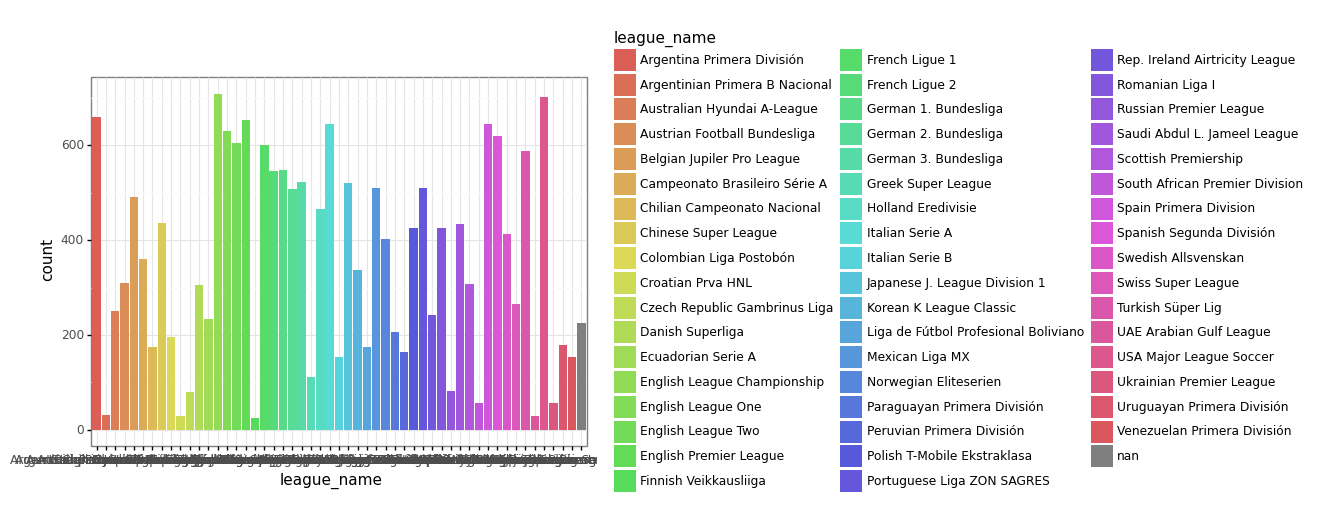

<ggplot: (8764865724639)>

In [12]:
(ggplot(fifa, aes(x = "league_name")) + geom_bar(aes(fill = "league_name")) + theme_bw())

#### This bar graph looks at the spread of leagues around the world. Shown in the graph, the top 5 most populous leagues are Major League Soccer, English League Championship, Argentinian Premier League, the English Premier League, and Spain Primera Division (La Liga Santander). England has two of the top five most populous leagues in the world, while Major League Soccer, the first division in the United States, Argentinian Premier League, the first division in Argentina. Of the typically known top 5 leagues, only two of the five have actual membership in the most populous leagues (English Premier League and Spain Primera Divison). 

In [13]:
fifa["club_name"].unique()

array(['FC Barcelona', 'Juventus', 'Atlético Madrid', 'FC Bayern München',
       'Paris Saint-Germain', 'Manchester City', 'Liverpool',
       'Real Madrid', 'Tottenham Hotspur', 'Inter', 'Napoli', 'Chelsea',
       'Borussia Dortmund', 'Manchester United', 'Arsenal', 'Lazio',
       'Atalanta', 'Real Sociedad', 'Borussia Mönchengladbach',
       'Leicester City', 'Milan', 'Olympique Lyonnais', 'RB Leipzig',
       'Villarreal CF', 'SL Benfica', 'Ajax', 'Everton', 'FC Porto',
       'Sevilla FC', 'Torino', 'Wolverhampton Wanderers', 'RC Celta',
       'AS Monaco', 'Valencia CF', 'Roma', 'VfL Wolfsburg', 'Real Betis',
       'Olympique de Marseille', 'Inter Miami', 'Beijing Sinobo Guoan FC',
       'Los Angeles FC', 'Al Shabab', 'Athletic Club de Bilbao',
       'Guangzhou Evergrande Taobao FC', 'Shanghai SIPG FC',
       'Eintracht Frankfurt', 'Bayer 04 Leverkusen', 'Levante UD',
       'Crystal Palace', 'Medipol Başakşehir FK', 'Newcastle United',
       'Grêmio', 'Fulham', 'LOSC Lil

In [14]:
fifa["club_name"].isnull().sum() #check if any players don't have a club

225

#### This means that, currently in FIFA, there are 225 players who don't currently have a league or club that they play for in real life and are free agents, meaning they can sign for any team on a free transfer if a club is looking for a player due to an injury or otherwise. Throughout the past 25 years, free transfers have shown it's extremely high value, as players who run down their current contract and elect to move clubs on a free transfer saves the club millions of dollars in transfer fees, allocating more money to the players' contract offer or towards another player to complete a squad.

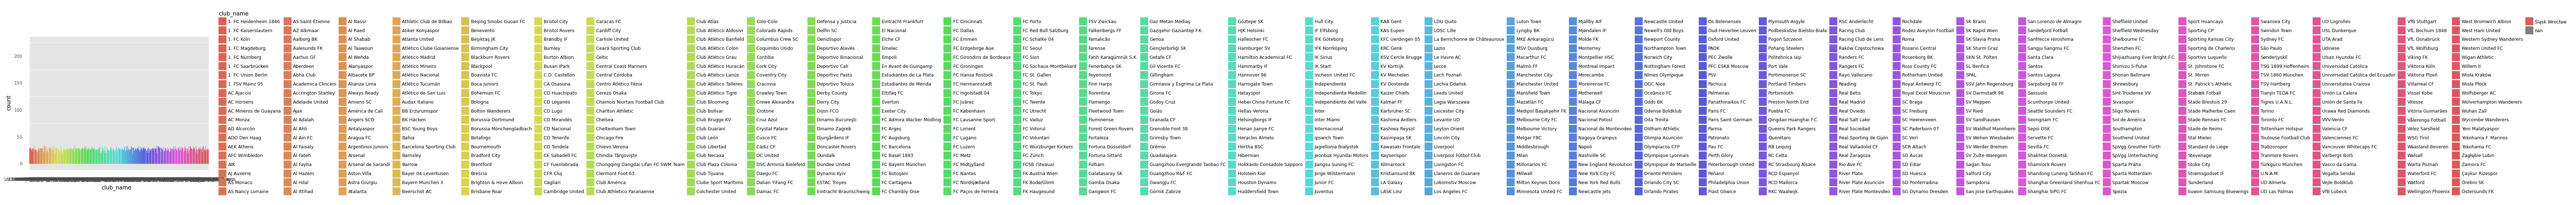

<ggplot: (8764865886395)>

In [15]:
(ggplot(fifa, aes(x = "club_name")) + geom_bar(aes(fill = "club_name")) + theme_minimal())

In [16]:
fifa["team_position"].unique()

array(['CAM', 'LS', 'GK', 'ST', 'LW', 'RCM', 'LCB', 'RW', 'SUB', 'CF',
       'CDM', 'RDM', 'RS', 'LCM', 'RB', 'LB', 'LM', 'RCB', 'LF', 'CB',
       'RM', 'LDM', 'RF', 'RES', 'LWB', 'CM', nan, 'LAM', 'RWB', 'RAM'],
      dtype=object)

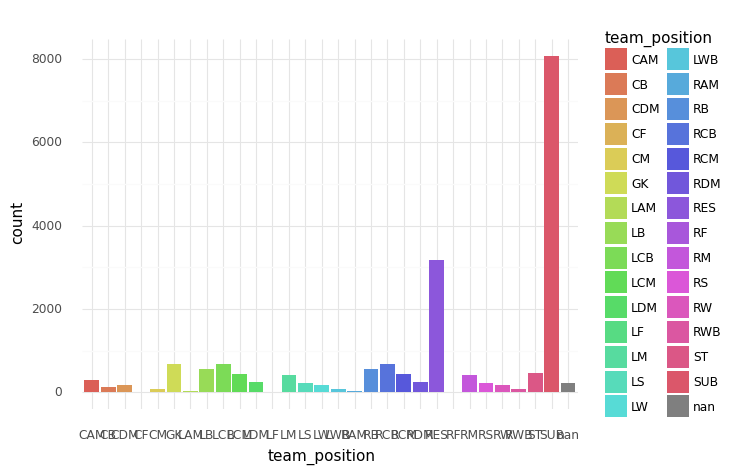

<ggplot: (8764868634847)>

In [17]:
(ggplot(fifa, aes(x = "team_position")) + geom_bar(aes(fill = "team_position")) + theme_minimal())

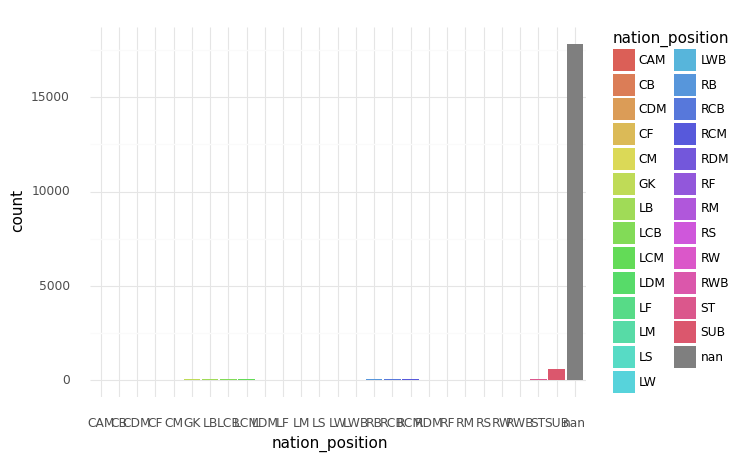

<ggplot: (8764867461542)>

In [18]:
(ggplot(fifa, aes(x = "nation_position")) + geom_bar(aes(fill = "nation_position")) + theme_minimal())

## Position Guide 

#### CAM - Central Attacking Midfielder ####
#### CB - Center Back
#### CDM - Central Defensive Midfielder
#### CF - Center Forward (Striker)
#### CM - Central Midfielder
#### GK - Goalkeeper
#### LAM - Left Attacking Midfielder
#### LB - Left Back
#### LCB - Left Center Back
#### LCM - Left Centrer Midfielder
#### LDM - Left Defensive Midfielder
#### LF - Left Forward
#### LM - Left Midfielder
#### LS - Left Striker
#### LW - Left Winger
#### LWB - Left Wing Back
#### RAM - Right Attacking Midfielder
#### RB - Right Back
#### RCB - Right Center Back
#### RCM - Rigth Center Midfielder
#### RDM - Right Defensive Midfielder
#### Res - Reserve, usually a player who is currently in the youth team set up but given first team opportunities in very limited, meaningless roles. A manager usually labels a home-grown academy player as a reserve, giving them the ability to play in league and cup matches for the first team as well as representing the various reserve teams that clubs have all around the world. 
#### RF - Right Forward
#### RM - Right Midfielder
#### RS - Right Striker
#### RW - Right Winger
#### RWB - Right Wing Back
#### ST - Striker
#### Sub - Substitute, meaning the player doesn't have a position that they primarily play and rather they come of the bench as a late game sub to impact a game whereever necessary. A player such as Marouane Fellaini would fit this category, who could play striker, center back, and midfield in the same game while player under David Moyes at Everton in the early 2000s. 
#### nan is the value given to players that don't have position for their club as they either aren't currently employed by a club, or select to only play national team football, which means players are representing their nation in International Friendlies and other International competition.

#### The two bar graphs above show the positions of players who play for the national team and players who play for clubs. In terms of positions, it is interesting to see the difference in National Team football and Club football. In National Team football, players only can play for their country of birth, with some exceptions. Given this, competition for roles in the national team is extremely high and there are limited roster spots that a country can have at one time. This means there are way more players who do not participate for their nation, which explains the extremely high amount of players who do not play for their national team but participate in club football, where they are employed and play for the club for a contracted amount of time. In terms of actual positions, youth players and multiple positioned players are very prevalent, as a majority of the total players are categorized in these positions. Of actually defined positions, the majority of players are goalkeeprs, right center backs, and left center backs. As these positions are the spine of your team, clubs usually focus their attention and wages on acquiring strong, reliable center backs and goalkeeps. As they say, the best form of offense is your defense, and this data correlates to that.

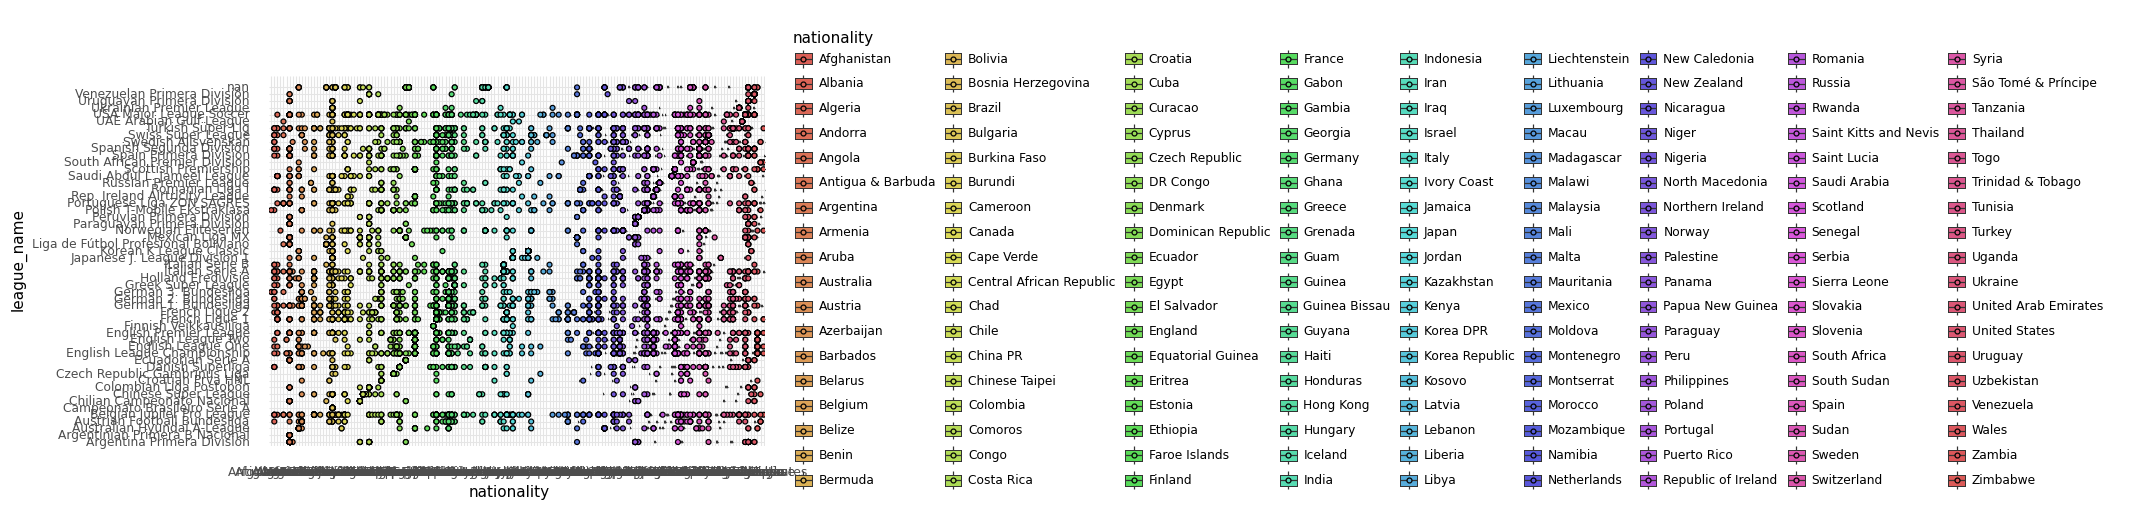

<ggplot: (8764865289141)>

In [19]:
(ggplot(fifa, aes(x = "nationality", y = "league_name", fill = "nationality")) + geom_boxplot() + geom_point() + theme_minimal())

#### The spread of nationalities between the leagues. As you can see, nations like Brazil and Germany have many of their national team players (and players of the nation) across the world, showing truly how diverse the wonderful game of football is.

Changes from F.P.3: Didn't make any box and whiskers or pie charts. I felt the analysis as it is was able to answer my questions. I took a more nations vs teams look at the data and ommitted the question about value since I had to make changes and wanted to look at value in a different light and try and predict it. 

# Can we cluster the game stats to help group stats into overall strengths of a player (strong, fast, technical, defensive, etc. ) and help group the players into general positions (goalkeeper, defenders, midfielders, forwards)?

#### Let's load in our data

In [20]:
fifa3 = pd.read_csv('/Users/christophergaldi/fifadata/players_21.csv')

fifa3.head(20)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


In [21]:
fifa3.shape

(18944, 106)

In [22]:
fifa3.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

In [23]:
fifa3.isnull().sum(axis = 0)

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

In [24]:
fifa3.isnull()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18940,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18941,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18942,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
fifa3["attacking_crossing"].isnull().sum()

0

In [26]:
fifa3["attacking_finishing"].isnull().sum()

0

In [27]:
fifa3["attacking_heading_accuracy"].isnull().sum()

0

In [28]:
fifa3["attacking_short_passing"].isnull().sum()

0

In [29]:
fifa3["attacking_volleys"].isnull().sum()

0

In [30]:
fifa3["skill_dribbling"].isnull().sum()

0

In [31]:
fifa3["skill_curve"].isnull().sum()

0

In [32]:
fifa3["skill_fk_accuracy"].isnull().sum()

0

In [33]:
fifa3["skill_long_passing"].isnull().sum()

0

In [34]:
fifa3["skill_ball_control"].isnull().sum()

0

In [35]:
fifa3["movement_acceleration"].isnull().sum()

0

In [36]:
fifa3["movement_sprint_speed"].isnull().sum()

0

In [37]:
fifa3["movement_agility"].isnull().sum()

0

In [38]:
fifa3["movement_reactions"].isnull().sum()

0

In [39]:
fifa3["movement_balance"].isnull().sum()

0

In [40]:
fifa3["power_shot_power"].isnull().sum()

0

In [41]:
fifa3["power_jumping"].isnull().sum()

0

In [42]:
fifa3["power_stamina"].isnull().sum()

0

In [43]:
fifa3["power_strength"].isnull().sum()

0

In [44]:
fifa3["power_long_shots"].isnull().sum()

0

In [45]:
fifa3["mentality_aggression"].isnull().sum()

0

In [46]:
fifa3["mentality_interceptions"].isnull().sum()

0

In [47]:
fifa3["mentality_positioning"].isnull().sum()

0

In [48]:
fifa3["mentality_vision"].isnull().sum()

0

In [49]:
fifa3["mentality_penalties"].isnull().sum()

0

In [50]:
fifa3["mentality_composure"].isnull().sum()

0

In [51]:
fifa3["defending_marking"].isnull().sum()  

18944

Defending_marking, for all players, was not recorded

In [52]:
fifa3["defending_standing_tackle"].isnull().sum()

0

In [53]:
fifa3["goalkeeping_diving"].isnull().sum()

0

In [54]:
fifa3["goalkeeping_handling"].isnull().sum()

0

In [55]:
fifa3["goalkeeping_kicking"].isnull().sum()

0

In [56]:
fifa3["goalkeeping_positioning"].isnull().sum()

0

In [57]:
fifa3["goalkeeping_reflexes"].isnull().sum()

0

### Hiearchal Agglomerative Clustering 

In [58]:
## optimal n = 2, then n = 3, then n = 4

In [59]:
hac_features = ["attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes"]
x = fifa3[hac_features]

z = StandardScaler()

x[hac_features] = z.fit_transform(x)

hac = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")

In [60]:
hac.fit(x)

AgglomerativeClustering()

In [61]:
membership = hac.labels_
membership

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
silhouette_score(x, membership)

0.5577933564564628

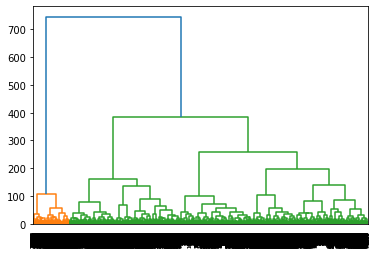

In [65]:
dendro = sch.dendrogram(sch.linkage(x, method = "ward", metric = "euclidean"))

In [66]:
fifa3["clusters"] = membership

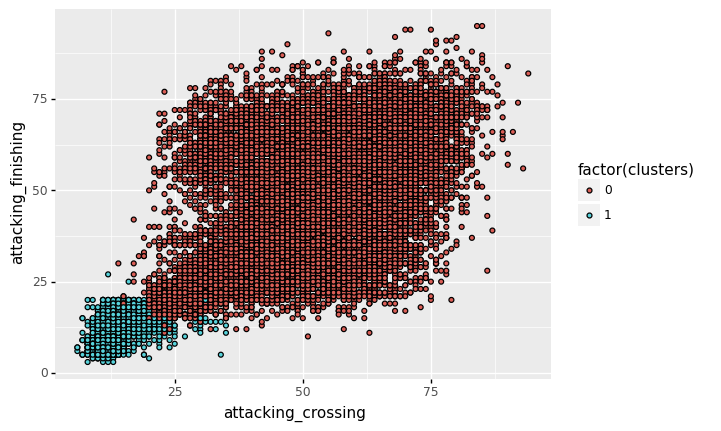

<ggplot: (8764872552156)>

In [67]:
(ggplot(fifa3, aes(x = "attacking_crossing", y = "attacking_finishing", fill = "factor(clusters)")) + geom_point())

Attacking stat finishing vs crossing

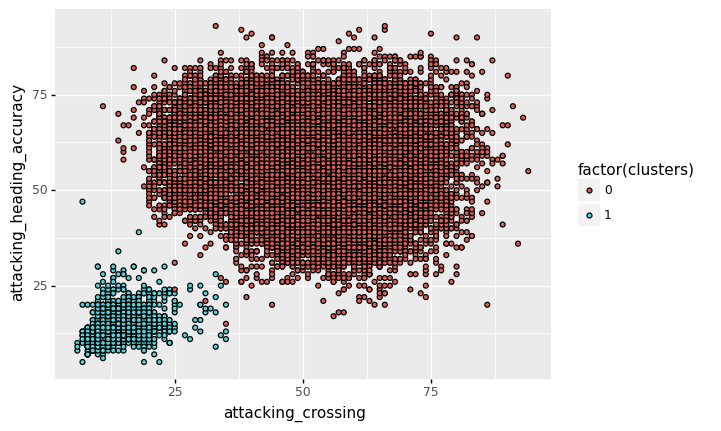

<ggplot: (8764465728979)>

In [68]:
(ggplot(fifa3, aes(x = "attacking_crossing", y = "attacking_heading_accuracy", fill = "factor(clusters)")) + geom_point())

Attacking heading accuracy vs crossing

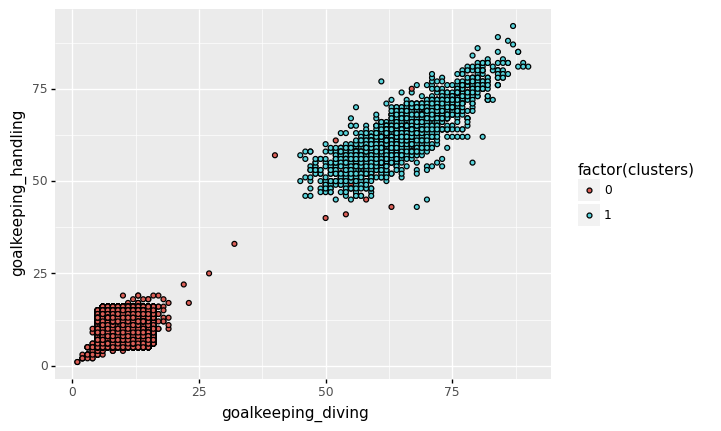

<ggplot: (8764464900708)>

In [69]:
(ggplot(fifa3, aes(x = "goalkeeping_diving", y = "goalkeeping_handling", fill = "factor(clusters)")) + geom_point())

goalkeeper handling vs diving

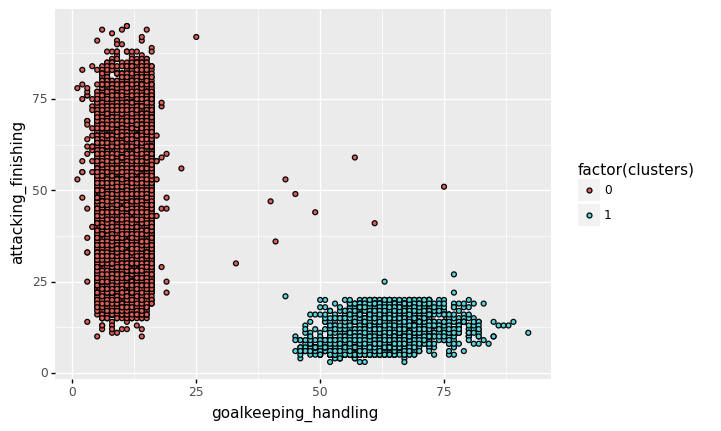

<ggplot: (8764465728961)>

In [70]:
(ggplot(fifa3, aes(x = "goalkeeping_handling", y = "attacking_finishing", fill = "factor(clusters)")) + geom_point())

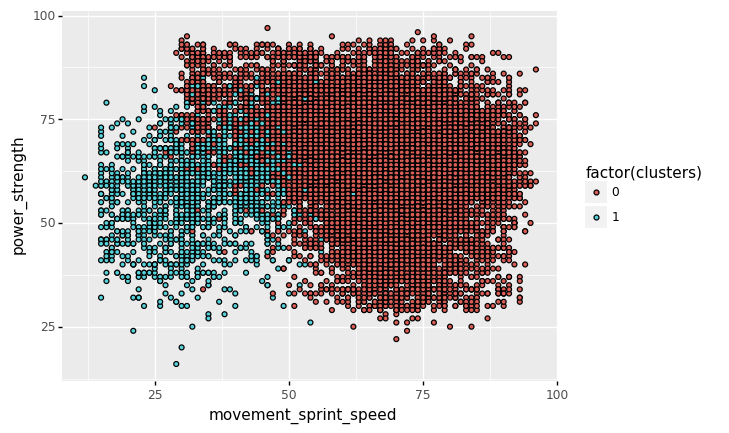

<ggplot: (8764546611953)>

In [71]:
(ggplot(fifa3, aes(x = "movement_sprint_speed", y = "power_strength", fill = "factor(clusters)")) + geom_point())

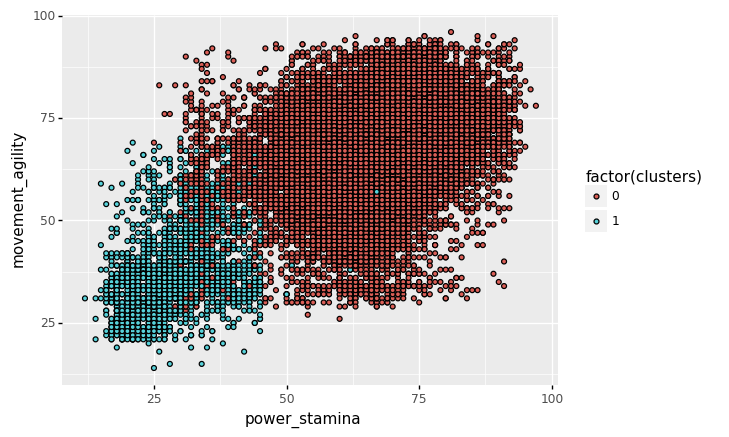

<ggplot: (8764467305439)>

In [72]:
(ggplot(fifa3, aes(x = "power_stamina", y = "movement_agility", fill = "factor(clusters)")) + geom_point())

#### When looking at the scatterplots to determine whether our clustering method provided any insight into the stats, the results of the ggplot showed two main clusters when looking at the silhouette score to determine the best numbers of clusters. With a silhouette score of 0.57, this shows that two clusters was by far the best method, with 3 and 4 clusters having sub-0.25 silhouette scores. With that, the two clusters that we have are categorized very differently. Cluster 1 focuses on the primarily goalkeeper friendly stats ("goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes") then when compared to the other more general position stats. Cluster 1 could have strictly goalkeepers contained in the cluster, as the rest of the stats showed that they had lower skills in those, especially when compared to cluster 0. Cluster 0, on the other hand, has a lot of success in the non-goalkeeper stats ("attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_standing_tackle", "defending_sliding_tackle"). However, when looking comparing the stats that the Cluster exceled in, the variation between the different stats was high. The only constant of Cluster was that their levels for the non-goalkeeper focused stats were way higher than cluster 1, showing they all play positions more in-field but not which positions or stats are more favorable for clusters.

# Can we predict the overall rating of a player using their game stats? Does it compare to the actual overall rating that is made up of the card stats? 

In [73]:
fifa4 = pd.read_csv('/Users/christophergaldi/fifadata/players_21.csv')
fifa4.head(20)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


In [74]:
fifa4.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

### Linear Regression ###

In [75]:
kf = KFold(n_splits = 10)

In [76]:
zScore = StandardScaler()

In [77]:
zScore.fit(fifa4[["attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes"]])

Z = zScore.transform(fifa4[["attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes"]])

fifa4[["attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes"]] = Z
               

In [78]:
fifa4.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [79]:
predictorsFIFA = ["attacking_crossing", "attacking_finishing", "attacking_heading_accuracy", "attacking_short_passing", "attacking_volleys", "skill_dribbling", "skill_curve", "skill_fk_accuracy", "skill_long_passing", "skill_ball_control", "movement_acceleration", "movement_sprint_speed", "movement_agility", "movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_diving", "goalkeeping_handling", "goalkeeping_kicking", "goalkeeping_positioning", "goalkeeping_reflexes", "age", "height_cm", "weight_kg", "weak_foot", "international_reputation", "potential"]
X = fifa4[predictorsFIFA]
y = fifa4["overall"]

lr = LinearRegression()
mse = []
r2 = []

In [80]:
for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    model = lr.fit(X_train, y_train)
    
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    r2.append(r2_score(y_test, model.predict(X_test)))
    
print("Train: ", mean_absolute_error(y_train, model.predict(X_train)))
print("Test: ", mean_absolute_error(y_test, model.predict(X_test)))

Train:  1.3792973536734738
Test:  2.3495765608282735


### Ridge Regression

In [81]:
rr = Ridge()

rr.fit(X_train, y_train)

print("Train: ", mean_absolute_error(y_train, rr.predict(X_train)))
print("Test: ", mean_absolute_error(y_test, rr.predict(X_test)))

Train:  1.3792956274369408
Test:  2.3497995479160934


### LASSO Regression

In [82]:
lsr = Lasso()

lsr.fit(X_train, y_train)

print("Train: ", mean_absolute_error(y_train, lsr.predict(X_train)))
print("Test: ", mean_absolute_error(y_test, lsr.predict(X_test)))

Train:  1.970542251459467
Test:  4.363007412902314


In [83]:
mse

[4.876004125301832,
 3.5960553011527443,
 3.162634026104703,
 2.933622923614311,
 3.202042884064904,
 3.0840465598497993,
 3.3808610022897376,
 3.5716847956703472,
 4.028808753496866,
 8.321212105566033]

In [84]:
np.mean(mse)

4.015697247711128

In [85]:
r2

[0.511135436890795,
 -2.8675683401854477,
 -5.317838354178984,
 -5.60908726194535,
 -11.95553785580713,
 -9.252173874319672,
 -7.0229962917357955,
 -5.270531301415425,
 -2.9680453503679916,
 -0.5384112342887535]

In [86]:
np.mean(r2)

-5.029105442735376

#### Looking at the results from our model, it looks like the stats from the players will not be able to predict the overall rating for the players accurately. Even when attempting to utilize LASSO, which makes the data more general, and Ridge, the variance of the values for the overall rating would be off by a few ratings with each prediction. As well, the model got a negative r2, which was poor. Of the models attempted, the closest to potentiall predicting the value would have been the regular regression, as it's train and test values were lower than the LASSo and Ridge mdoels and was closest to 0.  

Changes from F.P.3: Decided to do the regression model here. still attempted to do a prediction of the rating, but using the stats that were not mentioned in the article I read that theorized what stats they used. Potentially my skews could have been down to the weighted composition of the overall rating, but I attempted to spin the question to work to the variables and the active knowledge in an attempt to predict the overall rating. 

# Can we predict the real life evaluation of the value of a player using their age, overall rating in game, potential growth in rating in game, real life wages, weak foot in game, international recognition, and skill moves in game?

In [87]:
fifa5 = pd.read_csv('/Users/christophergaldi/fifadata/players_21.csv')
fifa5.head(20)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,29,1991-06-28,181,70,Belgium,Manchester City,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,21,1998-12-20,178,73,France,Paris Saint-Germain,...,67+3,63+3,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,28,1992-04-30,187,85,Germany,FC Barcelona,...,33+3,41+3,41+3,41+3,33+3,31+3,33+3,33+3,33+3,31+3
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,28,1991-07-08,193,92,Netherlands,Liverpool,...,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
9,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,27,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3


In [88]:
fifa5.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

In [89]:
kf = KFold(n_splits = 10)

In [90]:
zScore = StandardScaler()

In [91]:
zScore.fit(fifa5[["age", "weight_kg", "height_cm", "potential", "overall", "weak_foot", "overall", "skill_moves", "international_reputation", "wage_eur"]])

Z = zScore.transform(fifa5[["age", "weight_kg", "height_cm", "potential", "overall", "weak_foot", "overall", "skill_moves", "international_reputation", "wage_eur"]])

fifa5[["age", "weight_kg", "height_cm", "potential", "overall", "weak_foot", "overall", "skill_moves", "international_reputation", "wage_eur"]] = Z

In [92]:
fifa5.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1.655055,1987-06-24,-1.639556,-0.427506,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2.080838,1985-02-05,0.851107,1.131240,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,0.377707,1993-01-07,0.997617,1.698057,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,1.229273,1988-08-21,0.411579,0.706127,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,0.590598,1992-02-05,-0.907008,-0.994323,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [93]:
predictorValue = ["age", "weight_kg", "height_cm", "potential", "overall", "weak_foot", "overall", "skill_moves", "international_reputation", "wage_eur"]
X = fifa5[predictorValue]
y = fifa5["value_eur"]

lr = LinearRegression()
mse = []
r2 = []

In [94]:
for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y.iloc[train]
    y_test = y.iloc[test]
    
    model = lr.fit(X_train, y_train)
    
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    r2.append(r2_score(y_test, model.predict(X_test)))

In [95]:
mse

[117638346660606.9,
 5783300354327.514,
 3122227167699.5396,
 1980586462280.8687,
 841753317039.2543,
 749793209534.6334,
 805303794916.035,
 715919222449.5166,
 894503852353.2643,
 5444052490970.352]

In [96]:
np.mean(mse)

13797578653217.787

In [97]:
r2

[0.0224780184621588,
 -0.7627586061647742,
 -4.003367805361301,
 -17.22693668882208,
 -13.216298774694986,
 -18.83780565798677,
 -33.217160429968274,
 -70.34577562371308,
 -214.6918830553116,
 -3044.2263515889717]

In [98]:
np.mean(r2)

-341.6505860212532

In [99]:
coefficients = pd.DataFrame({"Coefs": lr.coef_, "Name": predictorValue})
coefficients = coefficients.append({"Coefs": lr.intercept_, "Name": "intercept"}, ignore_index = True)

In [100]:
coefficients

,Coefs,Name
0,-1.091415e+06,age
1,2.009974e+04,weight_kg
2,-6.558204e+04,height_cm
3,-1.786628e+05,potential
4,1.162739e+06,overall
5,2.017515e+04,weak_foot
6,1.162739e+06,overall
7,-4.652633e+04,skill_moves
8,3.897201e+05,international_reputation
9,3.063622e+06,wage_eur


In [101]:
coefficients["Odds Coefficient"] = np.exp(coefficients["Coefs"])
coefficients

,Coefs,Name,Odds Coefficient
0,-1.091415e+06,age,0.0
1,2.009974e+04,weight_kg,inf
2,-6.558204e+04,height_cm,0.0
3,-1.786628e+05,potential,0.0
4,1.162739e+06,overall,inf
5,2.017515e+04,weak_foot,inf
6,1.162739e+06,overall,inf
7,-4.652633e+04,skill_moves,0.0
8,3.897201e+05,international_reputation,inf
9,3.063622e+06,wage_eur,inf


In [102]:
y_pred = model.predict(X_test)
y_pred[1:10]

array([-1780879.55997286, -2928153.48575878, -1996867.48357553,
       -2151571.9676092 , -1647715.87822924, -2204481.96407232,
       -1981862.98353588, -2053376.7499605 , -1955908.89420287])

In [103]:
model.score(X_test, y_test)

-3044.2263515889717

In [104]:
model.score(X_train, y_train)

0.7722192583932526

In [105]:
true_vs_pred = pd.DataFrame({"predict": y_pred, "trueValue": y_test})
true_vs_pred.head()

,predict,trueValue
17050,-1.807920e+06,130000
17051,-1.780880e+06,120000
17052,-2.928153e+06,80000
17053,-1.996867e+06,120000
17054,-2.151572e+06,120000


#### According to my model, it would do pretty poor job of attempting to predict the value of a player. As the value of player is more focused on real-life play, I figured it would be that way, but I wanted to explore the posibility of using FIFA as another predictive analysis source, as current English Clubs utilize Football Manager to predict players and other nuianced things in a different light. In this scenario, the model score turned out negative, which wasn't encouraging. As well, the predicted value was negative, which you can't owe someone money in terms of your value, which could have been down to z-scoring or just the data not being able to predict a valuation of a player. Overall, it is unable to predict the value of a player.

Changes from FP.3: I was unable to do my question 4 completely, since I know the card stats were used to calculate the overall rating. I believe it did have an affect on my attempt at doing trying to predict overall value with the stats with the most potential, since those stats were not mentioned in the articles I read. Overall, I tried to predict the value of a player, which didn't go the way I planned. 